In [611]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [612]:
df = pd.read_csv('Book1.csv', encoding='windows-1251')

In [613]:
df.columns

Index(['Reg', 'REGTYPENAME', 'CLASSPROFILENAME', 'EONAME', 'EOTYPENAME',
       'UKRTEST', 'UKRBALL100', 'HISTTEST', 'HISTLANG', 'HISTTESTSTATUS',
       'HISTBALL100', 'MATHTEST', 'MATHLANG', 'MATHTESTSTATUS', 'MATHBALL100',
       'PHYSTEST', 'PHYSLANG', 'PHYSTESTSTATUS', 'PHYSBALL100', 'CHEMTEST',
       'CHEMLANG', 'CHEMTESTSTATUS', 'CHEMBALL100', 'BIOTEST', 'BIOLANG',
       'BIOTESTSTATUS', 'BIOBALL100', 'GEOTEST', 'GEOLANG', 'GEOTESTSTATUS',
       'GEOBALL100', 'ENGTEST', 'ENGTESTSTATUS', 'ENGBALL100', 'FRATEST',
       'FRATESTSTATUS', 'FRABALL100', 'DEUTEST', 'DEUTESTSTATUS',
       'DEUBALL100'],
      dtype='object')

In [614]:
#Назви Львівських шкіл
df['EONAME'].unique()

array(['Середня загальноосвітня школа №96 МЖК-1',
       'Львівська спеціалізована середня загальноосвітня школа І-ІІІ ступенів №81 ім. Петра Сагайдачного з поглибленим вивченням англійської мови',
       'Львівська загальноосвітня школа І-ІІІ ступенів №74 Львівської міської ради Львівської області',
       'Навчально-виховний комплекс "Школа-ліцей "Оріяна" м. Львова',
       'Навчально-виховний комплекс "Школа-гімназія "Сихівська"', nan,
       'Львівський навчально-виховний комплекс ім. В. Симоненка з поглибленим вивченням німецької мови "Спеціалізована школа І ступеня-гімназія"',
       'Середня спеціалізована загальноосвітня школа №93 з поглибленим вивченням англійської мови',
       'Середня загальноосвітня школа №73',
       'Львівська українська гуманітарна гімназія ім. Олени Степанів з поглибленим вивченням українознавства та англійської мови',
       'Середня загальноосвітня школа №67 м. Львова',
       'Середня загальноосвітня школа І-ІІІ ступенів №48 м. Львова',
       'Льві

In [615]:
df = df[df['REGTYPENAME'] != 'Випускник минулих років']

In [616]:
df.Reg.unique()

array(['Сихівський район міста', 'Шевченківський район міста', 'смт Рудне',
       'Франківський район міста', 'Залізничний район міста',
       'Галицький район міста', 'Личаківський район міста', 'м.Винники',
       'смт Брюховичі'], dtype=object)

In [617]:
df.Reg.unique()

array(['Сихівський район міста', 'Шевченківський район міста', 'смт Рудне',
       'Франківський район міста', 'Залізничний район міста',
       'Галицький район міста', 'Личаківський район міста', 'м.Винники',
       'смт Брюховичі'], dtype=object)

In [618]:
sykhiv = df.drop_duplicates('EONAME', keep = 'first')[df.Reg == 'Сихівський район міста'].EONAME.tolist()
shevch = df.drop_duplicates('EONAME', keep = 'first')[df.Reg == 'Шевченківський район міста'].EONAME.tolist()
rudno = df.drop_duplicates('EONAME', keep = 'first')[df.Reg == 'смт Рудне'].EONAME.tolist()
frank = df.drop_duplicates('EONAME', keep = 'first')[df.Reg == 'Франківський район міста'].EONAME.tolist()
zaliz = df.drop_duplicates('EONAME', keep = 'first')[df.Reg == 'Залізничний район міста'].EONAME.tolist()
lych = df.drop_duplicates('EONAME', keep = 'first')[df.Reg == 'Галицький район міста'].EONAME.tolist()
vyn = df.drop_duplicates('EONAME', keep = 'first')[df.Reg == 'м.Винники'].EONAME.tolist()
brukh = df.drop_duplicates('EONAME', keep = 'first')[df.Reg == 'смт Брюховичі'].EONAME.tolist()

In [597]:
#schools = sykhiv[0:11]
#schools = sykhiv[11:]

18

In [619]:
#Список шкіл, які цікавлять
schools = ['Львівський навчально-виховний комплекс ім. В. Симоненка з поглибленим вивченням німецької мови "Спеціалізована школа І ступеня-гімназія"',
'Львівський навчально-виховний комплекс ім. В. Стуса "спеціалізована школа І ступеня-гімназія міжнародних відносин"',
'Львівська спеціалізована середня загальноосвітня школа І-ІІІ ступенів №45 з поглибленим вивченням англійської мови',
'Класична гімназія при Львівському національному університеті імені Івана Франка',
'Спеціалізована середня загальноосвітня школа І-ІІІ ступенів №66 з поглибленим вивченням англійської мови та інформаційних технологій м.Львова',
'Середня загальноосвітня школа І-ІІІ ступенів №31 м. Львова',
"Спеціалізована середня загальноосвітня школа №46 м. Львова з поглибленим вивченням англійської мови ім. В'ячеслава Чорновола",
'Львівська спеціалізована середня загальноосвітня школа №2 І-ІІІ ступенів з поглибленим вивченням англійської мови',
'Середня загальноосвітня школа І-ІІІ ступенів №36 м. Львова',
'Львівська спеціалізована школа "Надія" з поглибленим вивченням предметів еколого-правового профілю', 
'Спеціалізована загальноосвітня школа №75 імені Лесі Українки з поглибленим вивченням англійської мови з 1 класу']
labels = ['Симоненка', 'Стуса', '45', 'Гімназія', '66', '31', '46', '2', '36', '75', 'Надія']
df1 = df[df['EONAME'].isin(schools)]
dict_schools = {'Львівський навчально-виховний комплекс ім. В. Симоненка з поглибленим вивченням німецької мови "Спеціалізована школа І ступеня-гімназія"' : 'Симоненка',
'Львівський навчально-виховний комплекс ім. В. Стуса "спеціалізована школа І ступеня-гімназія міжнародних відносин"' : 'Стуса',
'Львівська спеціалізована середня загальноосвітня школа І-ІІІ ступенів №45 з поглибленим вивченням англійської мови' : '45',
'Класична гімназія при Львівському національному університеті імені Івана Франка' : 'Гімназія',
'Спеціалізована середня загальноосвітня школа І-ІІІ ступенів №66 з поглибленим вивченням англійської мови та інформаційних технологій м.Львова' : '66',
'Середня загальноосвітня школа І-ІІІ ступенів №31 м. Львова' : '31',
"Спеціалізована середня загальноосвітня школа №46 м. Львова з поглибленим вивченням англійської мови ім. В'ячеслава Чорновола" : '46',
'Львівська спеціалізована середня загальноосвітня школа №2 І-ІІІ ступенів з поглибленим вивченням англійської мови' : '2',
'Середня загальноосвітня школа І-ІІІ ступенів №36 м. Львова' : '36',
'Спеціалізована загальноосвітня школа №75 імені Лесі Українки з поглибленим вивченням англійської мови з 1 класу' : '75',
'Львівська спеціалізована школа "Надія" з поглибленим вивченням предметів еколого-правового профілю': 'Надія'}
df1['labels'] = df1['EONAME'].map(dict_schools)

In [654]:
df.head()

,Reg,REGTYPENAME,CLASSPROFILENAME,EONAME,EOTYPENAME,UKRTEST,UKRBALL100,HISTTEST,HISTLANG,HISTTESTSTATUS,HISTBALL100,MATHTEST,MATHLANG,MATHTESTSTATUS,MATHBALL100,PHYSTEST,PHYSLANG,PHYSTESTSTATUS,PHYSBALL100,CHEMTEST,CHEMLANG,CHEMTESTSTATUS,CHEMBALL100,BIOTEST,BIOLANG,BIOTESTSTATUS,BIOBALL100,GEOTEST,GEOLANG,GEOTESTSTATUS,GEOBALL100,ENGTEST,ENGTESTSTATUS,ENGBALL100,FRATEST,FRATESTSTATUS,FRABALL100,DEUTEST,DEUTESTSTATUS,DEUBALL100
0,Сихівський район міста,Випускник загальноосвітнього навчального закладу 2017 року,Універсальний,Середня загальноосвітня школа №96 МЖК-1,середня загальноосвітня школа,Українська мова і література,100.0,NaN,NaN,NaN,NaN,Математика,українська,Зараховано,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Англійська мова,Не подолав поріг,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,Шевченківський район міста,Випускник загальноосвітнього навчального закладу 2017 року,Іноземної філології,Львівська спеціалізована середня загальноосвітня школа І-ІІІ ступенів №81 ім. Петра Сагайдачного з поглибленим вивченням англійської мови,середня загальноосвітня школа,Українська мова і література,172.0,NaN,NaN,NaN,NaN,Математика,українська,Зараховано,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Англійська мова,Зараховано,151.0,NaN,NaN,NaN,NaN,NaN,NaN
2,смт Рудне,Випускник загальноосвітнього навчального закладу 2017 року,Української філології,Львівська загальноосвітня школа І-ІІІ ступенів №74 Львівської міської ради Львівської області,середня загальноосвітня школа,Українська мова і література,179.0,NaN,NaN,NaN,NaN,Математика,українська,Зараховано,155.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Англійська мова,Зараховано,151.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Сихівський район міста,Випускник загальноосвітнього навчального закладу 2017 року,Інший,"Навчально-виховний комплекс ""Школа-ліцей ""Оріяна"" м. Львова",середня загальноосвітня школа,Українська мова і література,189.0,Історія України,українська,Зараховано,125.0,Математика,українська,Зараховано,186.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Англійська мова,Зараховано,167.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Сихівський район міста,Випускник загальноосвітнього навчального закладу 2017 року,Інший,"Навчально-виховний комплекс ""Школа-ліцей ""Оріяна"" м. Львова",середня загальноосвітня школа,Українська мова і література,199.0,Історія України,українська,Зараховано,185.0,Математика,українська,Зараховано,185.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Англійська мова,Зараховано,190.0,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
zno = ['UKRBALL100', 'HISTBALL100', 'MATHBALL100', 'PHYSBALL100','CHEMBALL100', 'BIOBALL100', 'GEOBALL100', 'ENGBALL100', 'FRABALL100', 'DEUBALL100']
zno_tests = [ukr, engl, math, phys, chem, bio, geo] 
zno_names = ['української', 'англійської', 'математики', 'фізики', '', 'хімії', 'біології', 'географії']

In [621]:
ukr = pd.DataFrame(df['UKRBALL100'].groupby(df['EONAME']).describe()).reset_index()
hist = pd.DataFrame(df['HISTBALL100'].groupby(df['EONAME']).describe()).reset_index()
engl = pd.DataFrame(df['ENGBALL100'].groupby(df['EONAME']).describe()).reset_index()
math = pd.DataFrame(df['MATHBALL100'].groupby(df['EONAME']).describe()).reset_index()
phys = pd.DataFrame(df['PHYSBALL100'].groupby(df['EONAME']).describe()).reset_index()
chem = pd.DataFrame(df['CHEMBALL100'].groupby(df['EONAME']).describe()).reset_index()
bio = pd.DataFrame(df['BIOBALL100'].groupby(df['EONAME']).describe()).reset_index()
geo = pd.DataFrame(df['GEOBALL100'].groupby(df['EONAME']).describe()).reset_index()

In [622]:
ukr = ukr.drop(['25%', '50%'], axis = 1)
ukr.columns =  [ 'Навчальний заклад', 'Кількість випускників', 'Середній бал з української мови', 'Станд відхилення', 'Мінімальний бал', '75% персентіль', 'Максимальний бал']
ukr['Кількість випускників'] = ukr['Кількість випускників'].astype('int')

In [623]:
hist = hist.drop(['25%', '50%'], axis = 1)
hist.columns =  [ 'Школа', 'Кількість історія', 'Середній бал з історії', 'Станд відхилення', 'Мінімальний бал', '75% персентіль', 'Максимальний бал']
engl = engl.drop(['25%', '50%'], axis = 1)
engl.columns =  [ 'Школа', 'Кількість англійська', 'Середній бал з англійської мови', 'Станд відхилення', 'Мінімальний бал', '75% персентіль', 'Максимальний бал']
math = math.drop(['25%', '50%'], axis = 1)
math.columns =  [ 'Школа', 'Кількість математика', 'Середній бал з математики', 'Станд відхилення', 'Мінімальний бал', '75% персентіль', 'Максимальний бал']
phys = phys.drop(['25%', '50%'], axis = 1)
phys.columns =  [ 'Школа', 'Кількість фізика', 'Середній бал з фізики', 'Станд відхилення', 'Мінімальний бал', '75% персентіль', 'Максимальний бал']
chem = chem.drop(['25%', '50%'], axis = 1)
chem.columns =  [ 'Школа', 'Кількість хімія', 'Середній бал з хімії', 'Станд відхилення', 'Мінімальний бал', '75% персентіль', 'Максимальний бал']
bio = bio.drop(['25%', '50%'], axis = 1)
bio.columns =  [ 'Школа', 'Кількість біологія', 'Середній бал з біології', 'Станд відхилення', 'Мінімальний бал', '75% персентіль', 'Максимальний бал']
geo = geo.drop(['25%', '50%'], axis = 1)
geo.columns =  [ 'Школа', 'Кількість географія', 'Середній бал з географії', 'Станд відхилення', 'Мінімальний бал', '75% персентіль', 'Максимальний бал']

In [624]:
zno_tests = [ukr, hist, engl, math, phys, chem, bio, geo] 
for z in zno_tests:
    z.iloc[:,2:] = round(z.iloc[:,2:], 0)
    z.iloc[:,1] = z.iloc[:,1].astype('int')

In [625]:
number = pd.DataFrame(ukr.iloc[:,0])
number['Українська'] = ukr.iloc[:,1]
number['Історія'] = hist.iloc[:,1]
number['Англійська'] = engl.iloc[:,1]
number['Математика'] = math.iloc[:,1]
number['Хімія'] = chem.iloc[:,1]
number['Біологія'] = bio.iloc[:,1]
number['Географія'] = geo.iloc[:,1]
number['Фізика'] = phys.iloc[:,1]

In [626]:
number['labels'] = number['Навчальний заклад'].map(dict_schools)

In [627]:
zno = pd.concat([ukr, math, engl, chem, bio, geo, phys], axis = 1)
zno = zno.drop(['Школа'], axis = 1)
zno = zno.sort_values(['Середній бал з української мови'], ascending = False)
pd.set_option('display.max_colwidth', -1)

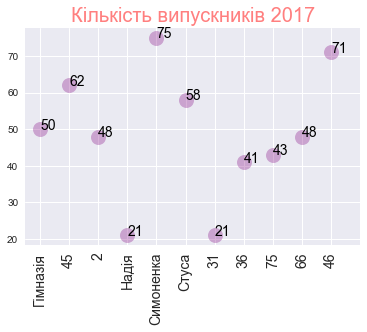

In [635]:
# subplot for number of pupils in school
fig, ax = plt.subplots()
ax.plot(number[number['Навчальний заклад'].isin(schools)].reset_index()['Українська'], 'o', ms=15, lw=2, alpha=0.3, mfc='purple')
xmarks=[i for i in range(0,len(number[number['Навчальний заклад'].isin(schools)]['labels'])+1,1)]
plt.xticks(xmarks)
ax.set_title('Кількість випускників 2017', fontsize=20,color="r",alpha=0.5)
ax.set_xticklabels(number[number['Навчальний заклад'].isin(schools)]['labels'], rotation = 90, size = 14)
for i, txt in enumerate(number[number['Навчальний заклад'].isin(schools)].reset_index()['Українська']):
    ax.annotate(txt, (xmarks[i],number[number['Навчальний заклад'].isin(schools)].reset_index()['Українська'][i]), size = 14, color = 'black')

[<matplotlib.text.Text at 0x752e50f0>, <matplotlib.text.Text at 0x752d4860>]

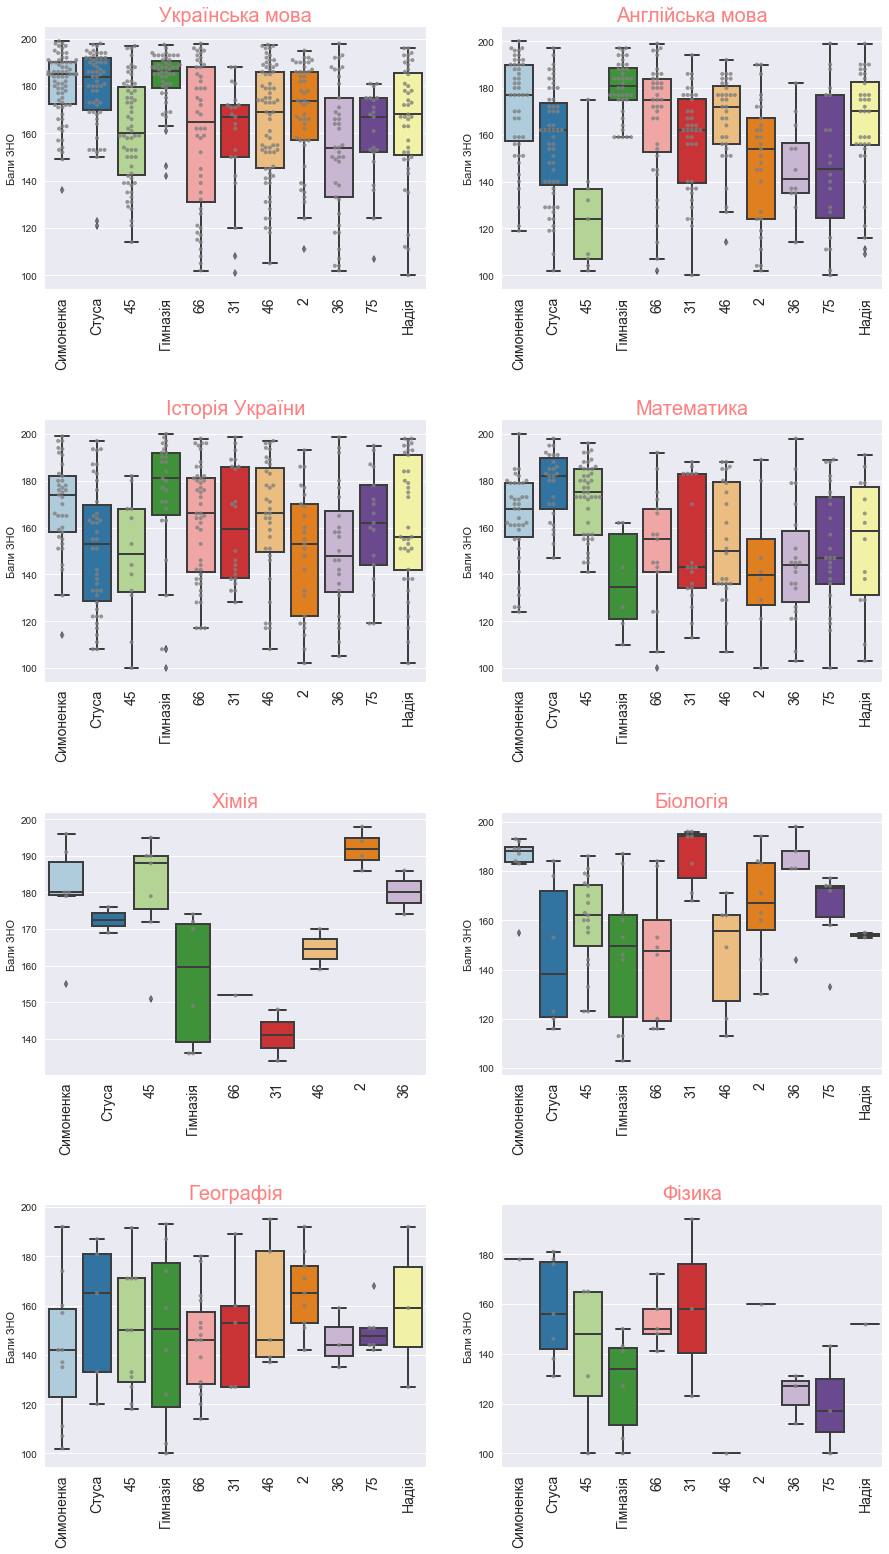

In [653]:
f, axes = plt.subplots(4,2, figsize=(15,25))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)
kws = dict(linewidth = 2.0, palette = 'Paired') 
kws1 = dict(color = 'grey', alpha = 0.8, size = 4) 

#zno_names = ['Українська мова',  'Математика', 'Англійська мова', 'Хімія', 'Біологія', 'Географія', 'Фізика']

p_ukr = sns.boxplot(y='UKRBALL100', x = 'EONAME', data=df1[df1['UKRBALL100']>99], ax = axes[0,0], **kws)
p1_ukr = sns.swarmplot(y='UKRBALL100', x = 'EONAME', data=df1[df1['UKRBALL100']>99], ax = axes[0,0], **kws1)
p_ukr.set_xticklabels(labels, rotation=90, fontsize = 14)
p_ukr.axes.set_title('Українська мова', fontsize=20,color="r",alpha=0.5)
p_ukr.set(ylabel='Бали ЗНО', xlabel = '')

p_engl = sns.boxplot(y='ENGBALL100', x = 'EONAME', data=df1[df1['ENGBALL100']>99], ax = axes[0,1], **kws)
sns.swarmplot(y='ENGBALL100', x = 'EONAME', data=df1[df1['ENGBALL100']>99], ax = axes[0,1], **kws1)
p_engl.set_xticklabels(labels, rotation=90, fontsize = 14)
p_engl.axes.set_title('Англійська мова', fontsize=20,color="r",alpha=0.5)
p_engl.set(ylabel='Бали ЗНО', xlabel = '')

p_hist = sns.boxplot(y='HISTBALL100', x = 'EONAME', data=df1[df1['HISTBALL100']>99], ax = axes[1,0], **kws)
sns.swarmplot(y='HISTBALL100', x = 'EONAME', data=df1[df1['HISTBALL100']>99], ax = axes[1,0], **kws1)
p_hist.set_xticklabels(labels, rotation=90, fontsize = 14)
p_hist.axes.set_title('Історія України', fontsize=20,color="r",alpha=0.5)
p_hist.set(ylabel='Бали ЗНО', xlabel = '')

p_math = sns.boxplot(y='MATHBALL100', x = 'EONAME', data=df1[df1['MATHBALL100']>99], ax = axes[1,1], **kws)
sns.swarmplot(y='MATHBALL100', x = 'EONAME', data=df1[df1['MATHBALL100']>99], ax = axes[1,1], **kws1)
p_math.set_xticklabels(labels, rotation=90, fontsize = 14)
p_math.axes.set_title('Математика', fontsize=20,color="r",alpha=0.5)
p_math.set(ylabel='Бали ЗНО', xlabel = '')

p_chem = sns.boxplot(y='CHEMBALL100', x = 'EONAME', data=df1[df1['CHEMBALL100']>99], ax = axes[2,0], **kws)
sns.swarmplot(y='CHEMBALL100', x = 'EONAME', data=df1[df1['CHEMBALL100']>99], ax = axes[2,0], **kws1)
p_chem.set_xticklabels(labels, rotation=90, fontsize = 14)
p_chem.axes.set_title('Хімія', fontsize=20,color="r",alpha=0.5)
p_chem.set(ylabel='Бали ЗНО', xlabel = '')

p_bio = sns.boxplot(y='BIOBALL100', x = 'EONAME', data=df1[df1['BIOBALL100']>99], ax = axes[2,1], **kws)
sns.swarmplot(y='BIOBALL100', x = 'EONAME', data=df1[df1['BIOBALL100']>99], ax = axes[2,1], **kws1)
p_bio.set_xticklabels(labels, rotation=90, fontsize = 14)
p_bio.axes.set_title('Біологія', fontsize=20,color="r",alpha=0.5)
p_bio.set(ylabel='Бали ЗНО', xlabel = '')

p_geo = sns.boxplot(y='GEOBALL100', x = 'EONAME', data=df1[df1['GEOBALL100']>99], ax = axes[3,0], **kws)
sns.swarmplot(y='GEOBALL100', x = 'EONAME', data=df1[df1['GEOBALL100']>99], ax = axes[3,0], **kws1)
p_geo.set_xticklabels(labels, rotation=90, fontsize = 14)
p_geo.axes.set_title('Географія', fontsize=20,color="r",alpha=0.5)
p_geo.set(ylabel='Бали ЗНО', xlabel = '')

p_phys = sns.boxplot(y='PHYSBALL100', x = 'EONAME', data=df1[df1['PHYSBALL100']>99], ax = axes[3,1], **kws)
sns.swarmplot(y='PHYSBALL100', x = 'EONAME', data=df1[df1['PHYSBALL100']>99], ax = axes[3,1], **kws1)
p_phys.set_xticklabels(labels, rotation=90, fontsize = 14)
p_phys.axes.set_title('Фізика', fontsize=20,color="r",alpha=0.5)
p_phys.set(ylabel='Бали ЗНО', xlabel = '')

In [438]:
#Function for plot for number of pupils in school

def pl(subject, axes):
    axes.plot(number[number['Навчальний заклад'].isin(schools)].reset_index()[subject], 'o', ms=15, lw=2, alpha=0.3, mfc='purple')
    plt.xticks([i for i in range(0,len(number[number['Навчальний заклад'].isin(schools)]['labels'])+1,1)])
    set_xticklabels(number[number['Навчальний заклад'].isin(schools)]['labels'], rotation = 90, size = 12)
    set(ylabel='Бали ЗНО')
    for i, txt in enumerate(number[number['Навчальний заклад'].isin(schools)].reset_index()[subject]):
        axes.annotate(txt, (xmarks[i],number[number['Навчальний заклад'].isin(schools)].reset_index()[subject][i]), size = 14, color = 'black')

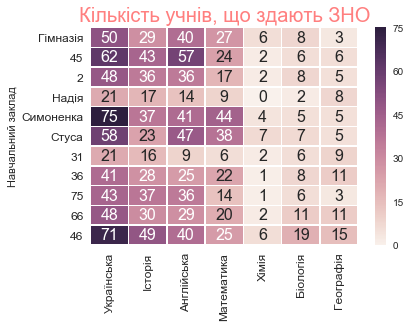

In [650]:
kws2 = dict(fontsize = 12)
num = sns.heatmap(number[number['Навчальний заклад'].isin(schools)].iloc[:, 1:8], annot = True, fmt="d", linewidths=.5, annot_kws={"size": 16})
num.set_xticklabels(number.columns[1:], rotation=90, **kws2)
num.set_yticklabels(reversed(number[number['Навчальний заклад'].isin(schools)]['labels'].tolist()), rotation = 360, **kws2)
num.axes.set_title('Кількість учнів, що здають ЗНО', fontsize=20,color="r",alpha=0.5)
num.set(ylabel='Навчальний заклад')